In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


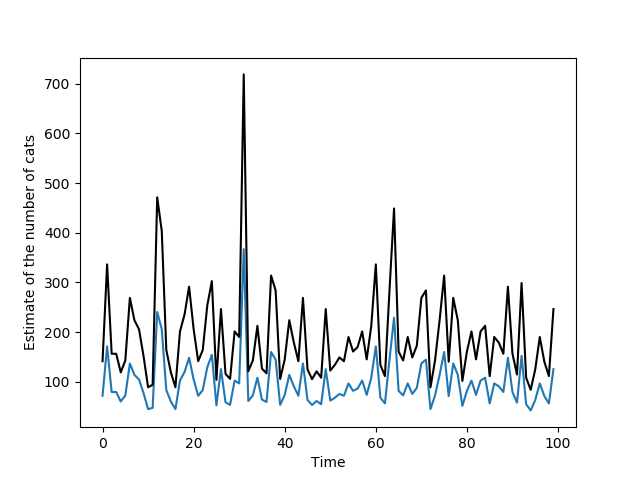

In [27]:
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin=0.01
vmax=0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)
vy = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)

#side
color = np.where(np.logical_and(x<trap_size, y<trap_size), 1, 0)
estimation = np.zeros(n_steps)
estimation_history = np.zeros(shape=(n_steps, n_animals))
n_marked = np.sum(color)

#middle
color2 = np.where(np.logical_and(x<trap_size, y<trap_size), 2, 0)
estimation2 = np.zeros(n_steps)
estimation_history2 = np.zeros(shape=(n_steps, n_animals))
n_marked2 = np.sum(color2)

for j in range(n_steps): 
    for i in range(n_steps): 
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx, vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy, vy)
      
        n_recap_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recap_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color)
        
        n_recap_total2 = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recap_marked2 = np.sum(np.logical_and(x<trap_size, y<trap_size)*color)
            
        estimation[i] = (n_marked+1)/(n_recap_marked+1)*(n_recap_total+1)-1
        
        estimation2[i] = (n_marked2+1)/(n_recap_marked2+1)*(n_recap_total2+1)-1
    
    estimation_history[j,:] = estimation[i]
    estimation_history2[j,:] = estimation2[i]
        
plt.figure()
plt.xlabel('Time')
plt.ylabel('Estimate of the number of cats')
plt.plot(estimation_history[:, n_animals-1]);
plt.plot(estimation_history2[:,n_animals-1], "-k");


## Border or Middle? 

For modeling if it is better to mark from the border or from the middle, I basically copied all of the code from the original and just added a 2 to the end of all the code for the border, and it made me feel like a terrible programmer but if it ain't broke why fix it?

In my model, the line that is black is for the animals recaptured from the middle, and the bue for those recaptured from the border. I would say that it is better to sample from the border because the estimations for the middle of the model field are really high relative to the number of n_animals. For example, the balck line is mostly above 100, and I would guess the average amount of animals to be around 200. Also, the black line for the middle sampling seems to dramatically spike more often and even higher than the blue line though the model is run for the same amount of steps in both scenarios. With these rapidly changing estimates, I would not be on favor of using the middle of an enviornment in a real world situation. 

<IPython.core.display.Javascript object>


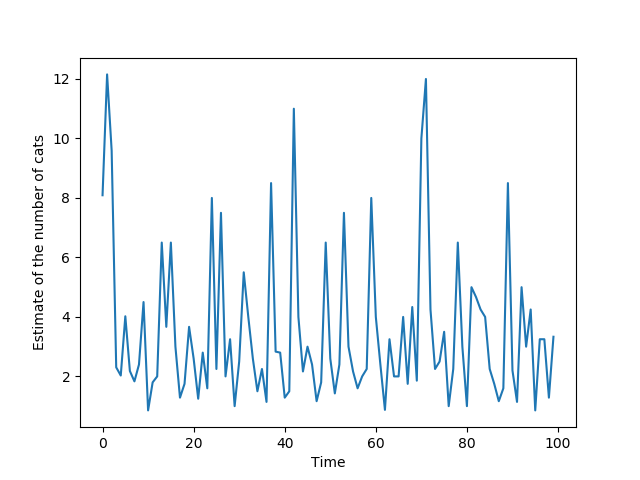

In [60]:
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin=0.01
vmax=0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)
vy = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)

color = np.where(np.logical_and(x<trap_size, y<trap_size), 1, 0)
estimation = np.zeros(n_steps)
estimation_history = np.zeros(shape=(n_steps, n_animals))
n_marked = np.sum(color)

#fig = plt.figure(figsize=(3,3))
#ax = plt.subplot(111)
#plt.xlim((0,1));
#plt.ylim((0,1));
#fig.show()
#fig.canvas.draw()

for j in range(n_steps): 
    for t in range(n_steps):
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
        if (np.random.randint(low= 0, high=2) ==1): #every ten steps, and if its on heads
            n_marked = 1.15*n_marked       
        else: n_marked = 0.85*n_marked

        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color)

        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1

    estimation_history[j,:] = estimation[i]
      
plt.figure();
plt.xlabel('Time')
plt.ylabel('Estimate of the number of cats')
plt.plot(estimation_history[:, n_animals-1]);

For this question, I added an if statement that was supposed to work by being a sort of coin toss proabability thing that would hopefully give you a 50% chance of growth at every timestep. However, there is something wrong with the numbers I am using to promote growth. If I do 1.15, I think the numbers are a little to low to be expected. If I use 1.30, the estimate jumps too rapidly to be graphed with the smallness of the beginning. I can't figure out the way to make it more steady, but if I had to guess, I would tell an ecologist to sample the population very soon to the initial sampling, then about every 